### TODOs
- currently nothing

In [1]:
import pandas as pd 
import numpy as np 
from classes import Election
from reader import read_election_data
from pprint import pprint

In [22]:
real_file = "Data/results.csv"

voters, candidates = read_election_data(real_file)
print(len(voters))
print(candidates)

2039
['No Confidence', 'Nick & Nur', 'Adarsh & Sisco', 'Hu & Cohrs', 'JJ & Patrick']


In [23]:
voters = [voter for voter in voters if voter.timestamp <= pd.Timestamp("2026-02-14 17:00:00")]
print(len(voters))
election = Election(voters, candidates)
election.run_election()


1849


'Adarsh & Sisco'

In [24]:
election.get_round_vote_counts(4)

,Rank 1,Rank 2
Adarsh & Sisco,804,259
Hu & Cohrs,757,303


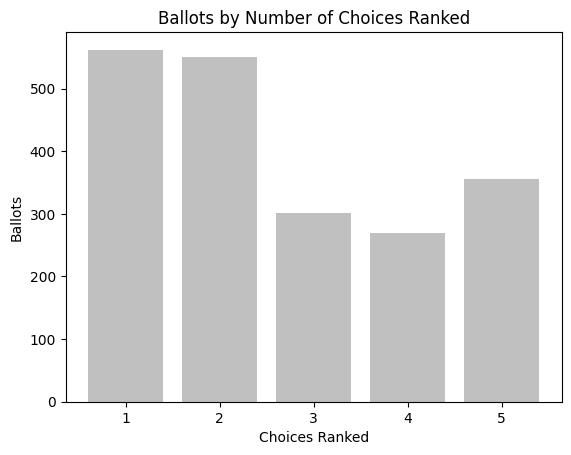

In [25]:
n_ranked = {}
for voter in voters:
    n_rk = len(voter.count_choices([]))
    if n_rk not in n_ranked.keys():
        n_ranked[n_rk] = 0
    n_ranked[n_rk] += 1

import matplotlib.pyplot as plt
plt.bar(n_ranked.keys(), n_ranked.values(), color="silver")
plt.xlabel("Choices Ranked")
plt.ylabel("Ballots")
plt.title("Ballots by Number of Choices Ranked")
plt.show()

In [ ]:
election.get_election_results()

In [ ]:
election.get_filtered_election_results(year=0)

In [ ]:
schools = []
for voter in voters:
    if voter.year not in schools:
        schools.append(voter.year)
print(schools)


In [ ]:
election.get_round_vote_counts(4)

In [ ]:
ticket = "No Confidence"
ticket_voters = [voter for voter in voters if ticket == voter.count_choices([])[0]]
len(ticket_voters)

In [ ]:
ticket_election = Election(ticket_voters, candidates)
ticket_election.run_election()
ticket_election.get_round_vote_counts(1).iloc[1:,1:]

In [ ]:
results_file = pd.read_csv("Data/results.csv")
results_file.columns[-7:]

In [ ]:
vote_times = results_file[["Submitted On","Please select your TOP choice for president/vice president ticket"]]
vote_times.columns = ["time", "ticket"]

In [ ]:
# Plot a graph of votes over time for each ticket
import matplotlib.pyplot as plt
import json

with open("Data/names.json", "r") as f:
    names = json.load(f)
    names["No Confidence"] = "No Confidence"
    vote_times["ticket"] = vote_times["ticket"].map(names)

vote_times["time"] = pd.to_datetime(vote_times["time"])
vote_times = vote_times.sort_values("time")
tickets = vote_times["ticket"].unique()

with open("Data/colors.json", "r") as f:
    ticket_colors = json.load(f)
    ticket_colors = {k: tuple([float(v[0])/255.0, float(v[1])/255.0, float(v[2])/255.0]) for k, v in ticket_colors.items()}

fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

for ticket in tickets:
    ticket_votes = vote_times[vote_times["ticket"] == ticket].copy()
    ticket_votes = ticket_votes.sort_values("time")
    ticket_votes["cumulative"] = np.arange(1, len(ticket_votes) + 1)
    ax.step(ticket_votes["time"], ticket_votes["cumulative"], label=ticket, color=ticket_colors.get(ticket, "black"))

ax.set_xlabel("Time")
ax.set_ylabel("Cumulative Votes")
ax.set_title("First choice votes over election period")
ax.legend()
plt.show()
